In [3]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

Funkcje do wyświetlania obrazów w skali szarości i RGB:

In [12]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    plt.show()

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")
    plt.show()

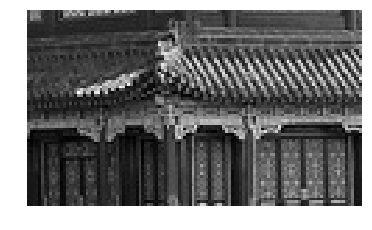

In [27]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]

#plot_image(image[:, :, 0])

height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)

plot_image(image_grayscale)

images = image_grayscale.reshape(1, height, width, 1)

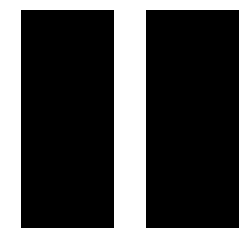

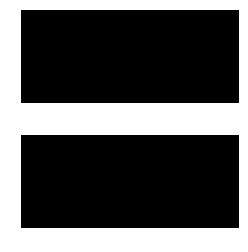

In [28]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [29]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [30]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

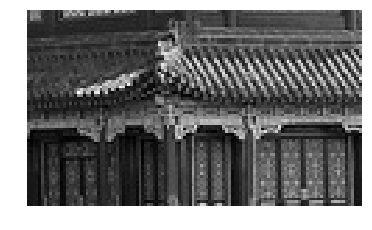

In [31]:
plot_image(images[0, :, :, 0])
plt.show()

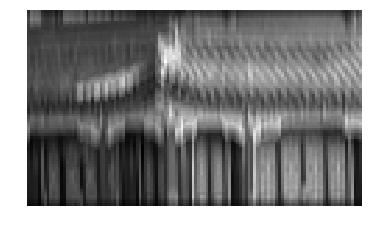

In [33]:
plot_image(output[0, :, :, 0])
plt.show()

# Zad. 
Wykonaj konwolucję przy uzyciu drugiej maski.

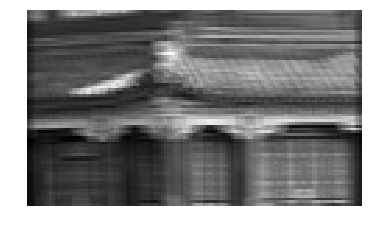

In [34]:
plot_image(output[0, :, :, 1])
plt.show()